## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("temp_data.txt", skiprows=111, header=None, sep='\t')

In [3]:
df.columns = ['station_id', 'series_number', 'date', 'temp', 'uncertainty', 'observations','ob_hour'  ]


In [4]:
df.head()

,station_id,series_number,date,temp,uncertainty,observations,ob_hour
0,25398,1,1986.708,26.611,0.0507,30,24
1,25398,1,1986.875,27.593,0.0507,30,24
2,25398,1,1986.958,28.226,0.0499,31,24
3,25398,1,1987.042,27.581,0.0499,31,24
4,25398,1,1987.125,27.996,0.0525,28,24


In [5]:
temp_x = pd.read_csv('temp_X.csv')

In [6]:
temp_x.head()

,Unnamed: 0,Station_ID,Series_Number,Date,X
0,0,25398,1,1986.708,79.8998
1,1,25398,1,1986.875,81.6674
2,2,25398,1,1986.958,82.8068
3,3,25398,1,1987.042,81.6458
4,4,25398,1,1987.125,82.3928


In [7]:
temp_x.columns = ['unnamed', 'station_id', 'series_number', 'date', 'X']
temp_x = temp_x[['station_id', 'series_number', 'date', 'X']]
df = df.merge(temp_x, on=['station_id', 'series_number', 'date'], left_index=True, right_index=True, how='outer')

In [28]:
df.head()

,station_id,series_number,date,temp,uncertainty,observations,ob_hour,X
0,25398,1,1986.708,26.611,0.0507,30,24,79.8998
1,25398,1,1986.875,27.593,0.0507,30,24,81.6674
2,25398,1,1986.958,28.226,0.0499,31,24,82.8068
3,25398,1,1987.042,27.581,0.0499,31,24,81.6458
4,25398,1,1987.125,27.996,0.0525,28,24,82.3928


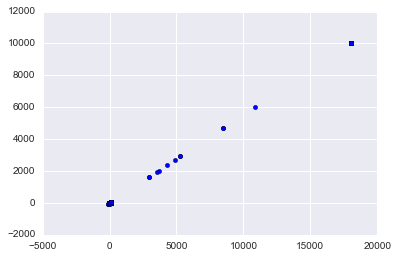

In [65]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df.X, df.temp)

There's definitely a linear relationship.

## Using Statsmodels

In [18]:
import statsmodels.api as sm
X = sm.add_constant(df.X)

In [22]:
model = sm.OLS(df.temp, X)

In [23]:
results = model.fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.087e+36
Date:                Tue, 14 Mar 2017   Prob (F-statistic):               0.00
Time:                        16:37:23   Log-Likelihood:             4.1778e+06
No. Observations:              141637   AIC:                        -8.356e+06
Df Residuals:                  141635   BIC:                        -8.356e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -17.7778   1.02e-16  -1.74e+17      0.000       -17.778   -17.778
X              0.5556   3.85e-19   1.44e+18      0.000         0.556     0.556
==============================================================================
Omnibus:                   494135.768   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     130887235361.889
Skew:                          67.895   Prob(JB):                         0.00
Kurtosis:                    4710.445   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
results.params

const   -17.777778
X         0.555556
dtype: float64

Looks like X is the temp in Farenheit and Y is the temp in Celcius so there is a perfect linear relationship
hence the r squared of 1.00 and the equation is the conversion of Farenheit to Celcius
Yes this is a perfect fit.

Regardless, taking a look at the residuals (which will be zero)


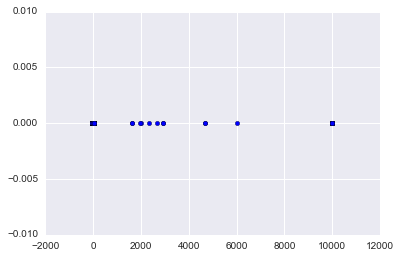

In [64]:
resids = results.resid
fitted_values= results.fittedvalues
plt.scatter(fitted_values, resids)

All of the residuals are zero, so no signal left in the data.

## Using sklearn

In [102]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
lm = regr.fit(df[['X']], df.temp)
lm.score(df[['X']], df.temp) # this is r squared
print 'intercept: ', lm.intercept_
print 'coeffiction: ', lm.coef_

intercept:  -17.7777777778
coeffiction:  [ 0.55555556]


In [104]:
print 'r squared: ', lm.score(df[['X']], df.temp)

r squared:  1.0
